##**Distribución t-student**
####**Andrés Alejandro Guzmán González - A01633819**

------------------------------------------------------------------------

Resuleve el siguiente problema en Python

Un nutricionista está investigando el contenido de vitamina C en dos tipos de jugo de naranja. Tomó muestras aleatorias de cada tipo de jugo y registró los siguientes niveles promedio de vitamina C en miligramos por 100 ml:

Tipo de jugo A: 20, 25, 22, 23, 28, 26, 24, 21, 27, 25, 24, 22, 23, 26, 25, 23, 24, 22, 27, 26, 25, 24, 23, 22, 21, 26, 24, 25, 22, 23.
Tipo de jugo B: 19, 18, 21, 20, 23, 22, 20, 19, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 23, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 18.

Calcula un intervalo de confianza del 99% para la media poblacional del contenido de vitamina C de ambos jugos.

Pasos que debes de seguir para resolver el problema:

1. Convierte los datos en un DataFrame. Esto te ayudará a realizar tus cálculos

2. Realiza una gráfica QQ-plot para determinar si los datos siguen una distribución normal. Recuerda que por defecto el método QQ-plot compara los datos con una normal estandar. Para obtener un correcto ajuste estandariza los datos o cambia los parámetros de la gráfica QQ-plot.

3. Aplica el test de Kolmogorov Smirnov para asegurarte si los datos son o no normales. Por defecto el test Kolmogorov compara los datos con una normal estandar, cambia los parámetros o estandariza los datos.

4. En caso de que no sean normales considera que tienen una distribución t-student.

5. Calcula el intervalo de confianza de acuerdo con la distribución de los datos y el nivel de confianza solicitado.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import math
import statsmodels.api as sm

In [ ]:
data = {
    'Tipo_A': [20, 25, 22, 23, 28, 26, 24, 21, 27, 25, 24, 22, 23, 26, 25, 23, 24, 22, 27, 26, 25, 24, 23, 22, 21, 26, 24, 25, 22, 23],
    'Tipo_B': [19, 18, 21, 20, 23, 22, 20, 19, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 23, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 18]
}
df = pd.DataFrame(data)
df.head()

,Tipo_A,Tipo_B
0,20,19
1,25,18
2,22,21
3,23,20
4,28,23


In [ ]:
def estandarizar_datos(data):
    mean = np.mean(data)
    std_dev = np.std(data)/math.sqrt(df.shape[0])
    standardized_data = (data - mean) / std_dev
    return standardized_data

df_estandar = df.apply(estandarizar_datos)


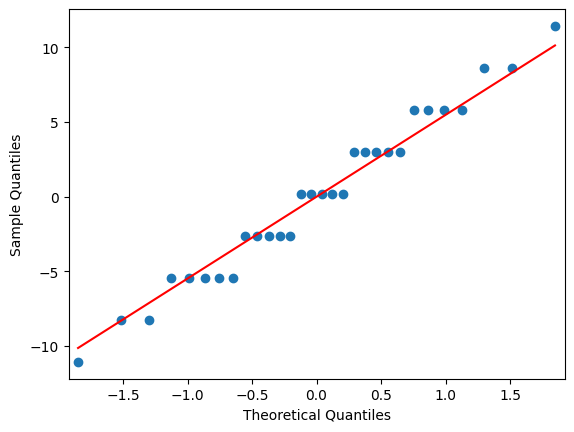

In [ ]:
QQ = sm.qqplot(df_estandar['Tipo_A'], line='s')

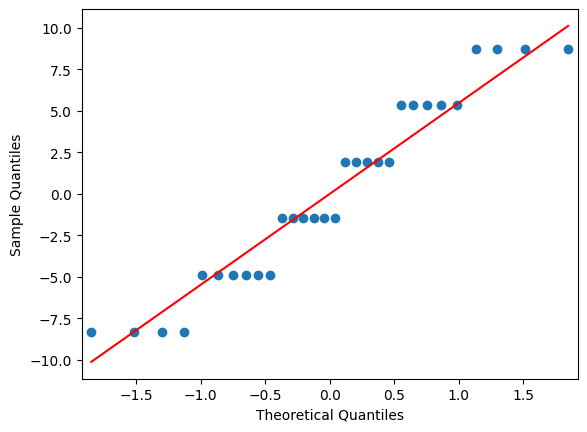

In [ ]:
QQ = sm.qqplot(df_estandar['Tipo_B'], line='s')

In [ ]:
ks_statistic_a= stats.kstest(df_estandar['Tipo_A'], 'norm')
ks_statistic_a

KstestResult(statistic=0.42898782780148464, pvalue=1.5705101005754954e-05, statistic_location=-2.6239752097989313, statistic_sign=1)

In [ ]:
ks_statistic_b= stats.kstest(df_estandar['Tipo_B'], 'norm')
ks_statistic_b

KstestResult(statistic=0.4636257893182324, pvalue=1.9977943958857735e-06, statistic_location=-1.477972690698536, statistic_sign=1)

##### Considerando los valores del P-Value son menores a 0.05 podemos concluir que las muestras NO siguen una distribución normal. Ahora procedemos a realizar el cálculo de los intervalos de confianza.

## Intervalo de confianza
##### **Nivel de confianza del 99%**

Intervalo Tipo A

In [ ]:
niv_conf = 0.99
alpha = (1-niv_conf)/2
t_critical = 2.756
n = df.shape[0]

mean_a = np.mean(df['Tipo_A'])
std_dev_a = np.sqrt(sum((x - mean_a)**2 for x in df['Tipo_A']) / (len(df['Tipo_A']) - 1))

margin_error_a = t_critical * (std_dev_a / np.sqrt(n))
conf_interval_a = (mean_a - margin_error_a, mean_a + margin_error_a)

print("Int. de confianza del Tipo_A:", conf_interval_a)


Int. de confianza del Tipo_A: (22.936281146025888, 24.93038552064078)


Intervalo Tipo B

In [ ]:
mean_b = np.mean(df['Tipo_B'])
std_dev_b = np.sqrt(sum((x - mean_b)**2 for x in df['Tipo_B']) / (len(df['Tipo_B']) - 1))

margin_error_b = t_critical * (std_dev_b / np.sqrt(n))
conf_interval_b = (mean_b - margin_error_b, mean_b + margin_error_b)
print("\nInt. de confianza del Tipo_B:", conf_interval_b)



Int. de confianza del Tipo_B: (19.611475819976828, 21.25519084668984)
